# Analise de dados simples

In [3]:
# Importando as bibliotecas necessárias
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Conectando ao banco de dados SQLite
conn = sqlite3.connect('vendas.db')

# Carregando os dados das tabelas em DataFrames
vendas_df = pd.read_sql_query(''' 
SELECT vendas.id_venda, clientes.nome, produtos.nome_produto, vendas.quantidade, vendas.data_venda, produtos.preco_unitario
FROM vendas
JOIN clientes ON vendas.id_cliente = clientes.id_cliente
JOIN produtos ON vendas.id_produto = produtos.id_produto
''', conn)

# Fechando a conexão
conn.close()

# Exibindo as primeiras linhas dos dados para conferirmos
vendas_df.head()


,id_venda,nome,nome_produto,quantidade,data_venda,preco_unitario
0,1,João,Mesa,1,2025-02-14,600.0
1,2,Maria,Cadeira,3,2025-02-13,200.0
2,3,Carlos,Teclado,2,2025-02-12,100.0
3,4,Ana,Cadeira,1,2025-02-10,200.0
4,5,José,Mesa,2,2025-02-08,600.0


# Analisando os dados

In [4]:
# Total de vendas por cliente
vendas_cliente = vendas_df.groupby('nome')['quantidade'].sum().reset_index()

# Total de vendas por produto
vendas_produto = vendas_df.groupby('nome_produto')['quantidade'].sum().reset_index()

# Total de vendas em valor
vendas_df['valor_venda'] = vendas_df['quantidade'] * vendas_df['preco_unitario']
vendas_valor = vendas_df.groupby('nome_produto')['valor_venda'].sum().reset_index()

# Gerando os graficos

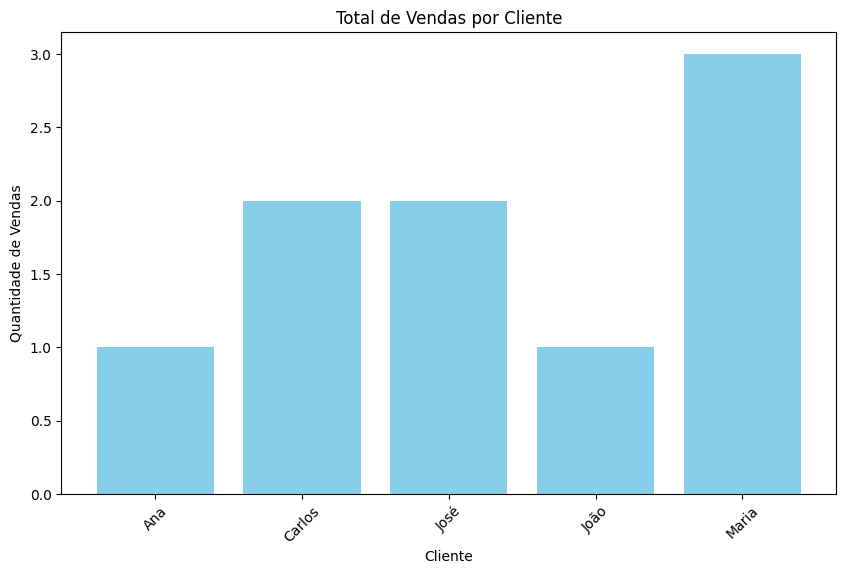

In [5]:
# Gráfico 1: Total de vendas por cliente
plt.figure(figsize=(10, 6))
plt.bar(vendas_cliente['nome'], vendas_cliente['quantidade'], color='skyblue')
plt.title('Total de Vendas por Cliente')
plt.xlabel('Cliente')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.show()

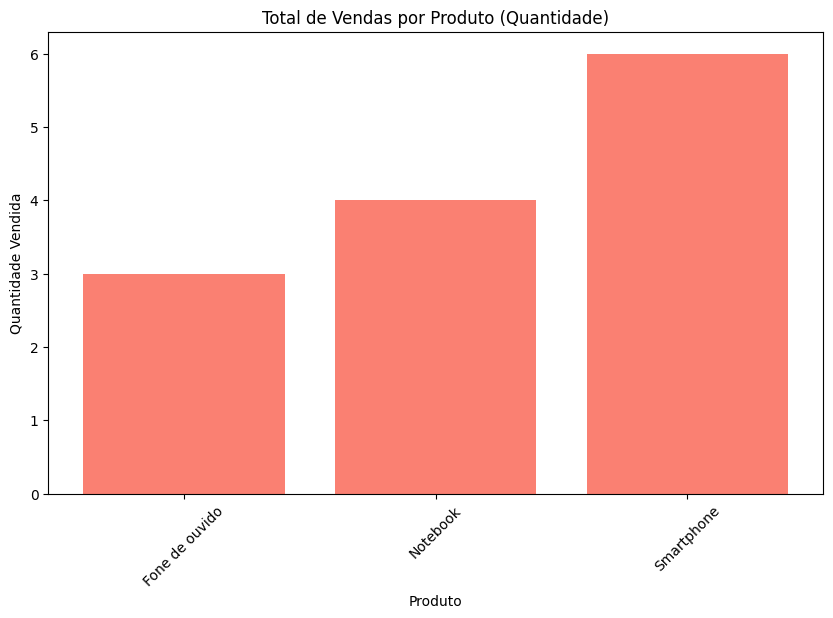

In [6]:
# Gráfico 2: Total de vendas por produto (quantidade)
plt.figure(figsize=(10, 6))
plt.bar(vendas_produto['nome_produto'], vendas_produto['quantidade'], color='salmon')
plt.title('Total de Vendas por Produto (Quantidade)')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.show()

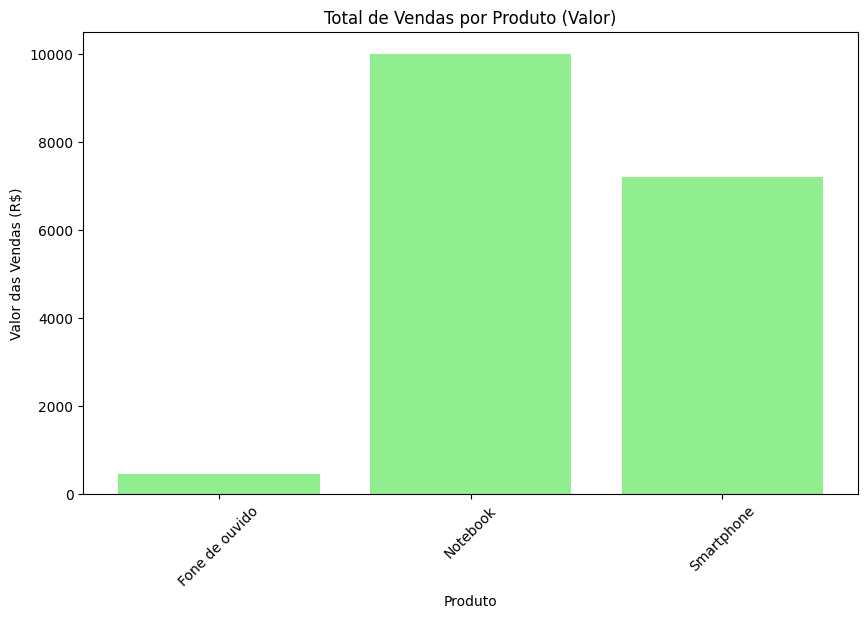

In [7]:
# Gráfico 3: Total de vendas por produto (em valor)
plt.figure(figsize=(10, 6))
plt.bar(vendas_valor['nome_produto'], vendas_valor['valor_venda'], color='lightgreen')
plt.title('Total de Vendas por Produto (Valor)')
plt.xlabel('Produto')
plt.ylabel('Valor das Vendas (R$)')
plt.xticks(rotation=45)
plt.show()